In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from keras import datasets, Model, layers, optimizers, regularizers

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

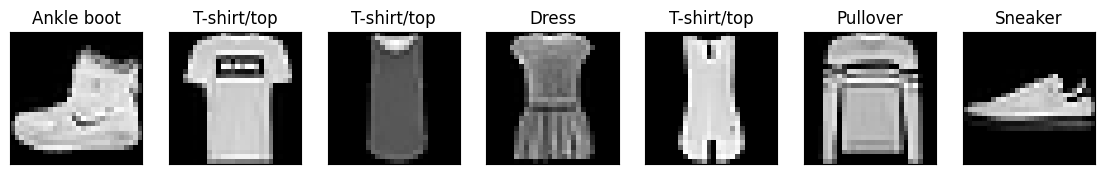

In [4]:
plt.figure(figsize=(14,10))
for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

In [5]:
train_images_normalized = train_images.astype('float32')/255.
test_images_normalized = test_images.astype('float32')/255.

In [6]:
train_images_normalized.shape

(60000, 28, 28)

In [7]:
X_train = train_images_normalized[:50000]
y_train = train_labels[:50000]
X_val = train_images_normalized[50000:]
y_val = train_labels[50000:]

## MLP Model

In [8]:
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_val_mlp = X_val.reshape(X_val.shape[0], -1)
X_test_mlp = test_images_normalized.reshape(test_images_normalized.shape[0], -1)

In [47]:
inp = layers.Input(shape=(784,))
# x = layers.Dense(32, kernel_regularizer=regularizers.L2(0.001),
#                  activation='relu')(inp)
x = layers.Dense(32, activation='relu')(inp)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(32, kernel_regularizer=regularizers.L2(0.001),
#                  activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_mlp = Model(inputs=inp, outputs=out)
model_mlp.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_mlp.compile(optimizer=optimizers.Adam(learning_rate=0.005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [49]:
history_mlp = model_mlp.fit(X_train_mlp, y_train,
                            epochs=40,
                            batch_size=128,
                            validation_data=(X_val_mlp, y_val),
                            verbose=0)

<Axes: >

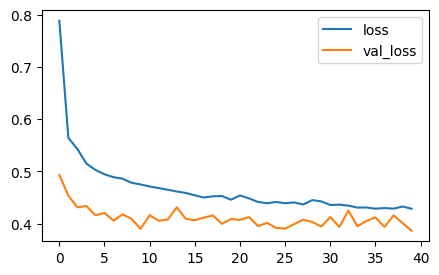

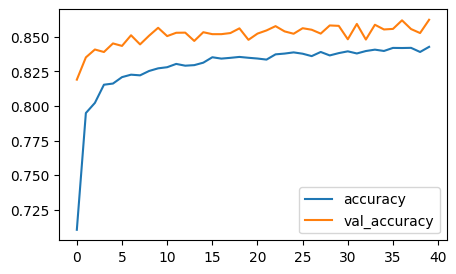

In [50]:
history_mlp_df = pd.DataFrame(history_mlp.history)
history_mlp_df[['loss', 'val_loss']].plot(figsize=(5,3))
history_mlp_df[['accuracy', 'val_accuracy']].plot(figsize=(5,3))

In [51]:
loss, acc = model_mlp.evaluate(X_test_mlp, test_labels)
print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {acc*100:.2f} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.4005
Test loss: 0.41
Test accuracy: 85.20 %


## CNN Model

In [14]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test_cnn = test_images_normalized.reshape(test_images_normalized.shape[0], 28, 28, 1)

In [52]:
inp = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32, 3, padding='same')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,010 (93.79 KB)

 Trainable params: 23,818 (93.04 KB)

 Non-trainable params: 192 (768.00 B)

In [53]:
model_cnn.compile(optimizer=optimizers.Adam(learning_rate=0.005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [54]:
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=40,
                            batch_size=128,
                            validation_data=(X_val_cnn, y_val),
                            verbose=0)

<Axes: >

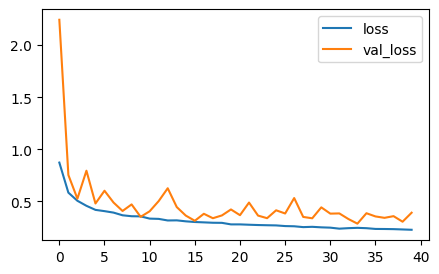

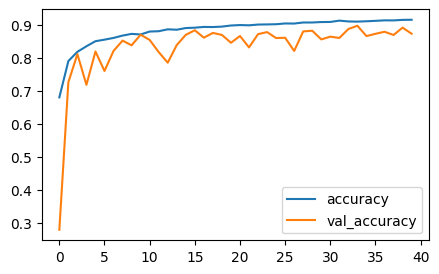

In [55]:
history_cnn_df = pd.DataFrame(history_cnn.history)
history_cnn_df[['loss', 'val_loss']].plot(figsize=(5,3))
history_cnn_df[['accuracy', 'val_accuracy']].plot(figsize=(5,3))

In [56]:
loss, acc = model_cnn.evaluate(X_test_cnn, test_labels)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc*100:.2f} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.4207
Test loss: 0.40840721130371094
Test accuracy: 86.83 %


## Extend the training (fine-tuning)

In [57]:
model_mlp.compile(optimizer=optimizers.Adam(5e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_mlp_ex = model_mlp.fit(X_train_mlp, y_train,
                               initial_epoch=40,
                               epochs=80,
                               batch_size=128,
                               validation_data=(X_val_mlp, y_val),
                               verbose=0)

In [58]:
model_cnn.compile(optimizer=optimizers.Adam(5e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_cnn_ex = model_cnn.fit(X_train_cnn, y_train,
                               initial_epoch=40,
                               epochs=80,
                               batch_size=128,
                               validation_data=(X_val_cnn, y_val),
                               verbose=0)

In [59]:
history_mlp_ex_df = pd.DataFrame(history_mlp_ex.history)
history_mlp_combined = pd.concat([history_mlp_df, history_mlp_ex_df],
                                 ignore_index=True)

In [60]:
history_cnn_ex_df = pd.DataFrame(history_cnn_ex.history)
history_cnn_combined = pd.concat([history_cnn_df, history_cnn_ex_df],
                                 ignore_index=True)

In [61]:
history_cnn_combined.head()

,accuracy,loss,val_accuracy,val_loss
0,0.68068,0.873356,0.2784,2.244517
1,0.79114,0.584840,0.7269,0.754380
2,0.81916,0.506669,0.8121,0.526661
3,0.83596,0.458337,0.7189,0.795313
4,0.85140,0.419223,0.8201,0.480633


In [62]:
history_cnn_combined.tail()

,accuracy,loss,val_accuracy,val_loss
75,0.94786,0.143078,0.9118,0.276128
76,0.94784,0.142029,0.9073,0.289446
77,0.94854,0.143172,0.9048,0.294582
78,0.94858,0.142459,0.9116,0.267462
79,0.94814,0.142683,0.9099,0.278202


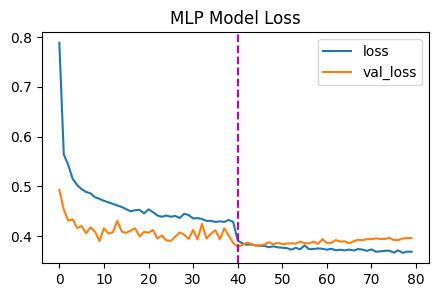

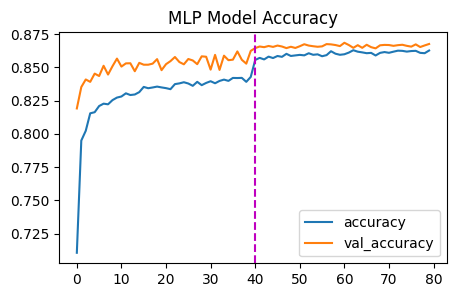

In [63]:
history_mlp_combined[['loss', 'val_loss']].plot(figsize=(5,3))
plt.axvline(x=len(history_mlp_df), color='m', linestyle='--')
plt.title('MLP Model Loss')
history_mlp_combined[['accuracy', 'val_accuracy']].plot(figsize=(5,3))
plt.axvline(x=len(history_mlp_df), color='m', linestyle='--')
plt.title('MLP Model Accuracy')
plt.show()

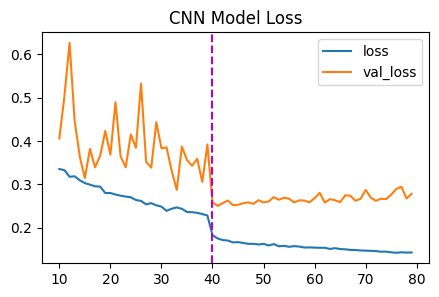

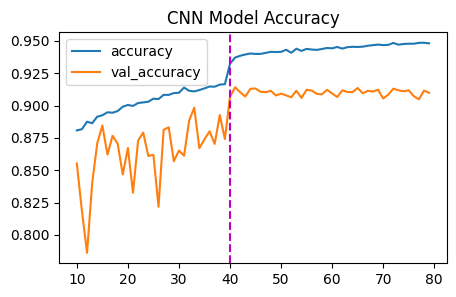

In [64]:
history_cnn_combined[['loss', 'val_loss']][10:].plot(figsize=(5,3))
plt.axvline(x=len(history_cnn_df), color='m', linestyle='--')
plt.title('CNN Model Loss')
history_cnn_combined[['accuracy', 'val_accuracy']][10:].plot(figsize=(5,3))
plt.axvline(x=len(history_cnn_df), color='m', linestyle='--')
plt.title('CNN Model Accuracy')
plt.show()

In [65]:
loss_mlp, acc_mlp = model_mlp.evaluate(X_test_mlp, test_labels)
loss_cnn, acc_cnn = model_cnn.evaluate(X_test_cnn, test_labels)
print(f'Test loss:     MLP: {loss_mlp:.2f}   | CNN: {loss_cnn:.2f}')
print(f'Test accuracy: MLP: {acc_mlp*100:.2f}% | CNN: {acc_cnn*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.3992
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9055 - loss: 0.3000
Test loss:     MLP: 0.41   | CNN: 0.30
Test accuracy: MLP: 86.13% | CNN: 90.62%
